In [12]:
import pandas as pd
import pickle
import os
import time
from tqdm.notebook import tqdm
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
col_names=['wrf','wsf','Kh','alpha','eps','xi','dmean',
                                   'a','pr','ps','muh','gamma','h','q',
                                   'pRf','pSf','pFf','pRmean','pSmean','pFmean',
                                   'hRf','hSf','hFf','hRmean','hSmean','hFmean',
                                    'fRprev','Rprev_mean','fSprev','Sprev_mean',
                                   'Frmse','Srmse','Rrmse','prevR_rmse']
col2script={'wrf':'\u03C9RF','wsf':'\u03C9SF','Kh':'KH','alpha':'\u03B1','eps':'\u03B5','xi':'\u03BE','dmean':'d',
           'a':'a','pr':'pr','ps':'ps','muh':'\u03BCh','gamma':'\u03B3','h':'h','q':'q'}

def read_data(f_name):
    """Reads single parquet file"""
    return pd.read_parquet(f_name,columns=col_names)

def load_threads(f_names):
    """Load data with threads"""
    ts = time.time()
    parallel = joblib.Parallel(n_jobs=24, prefer='threads')
    read_data_delayed = joblib.delayed(read_data)
    res = parallel(read_data_delayed(f_name) for f_name in tqdm(f_names))
    df = pd.concat(res)
    te = time.time()
    print(f'Load threads took {te-ts:.5f} sec')
    return df

In [3]:
s_t=time.time()
directory='data/sens_res_prev'
lst=os.listdir(directory)
lst_path=[directory+'/'+fi for fi in lst if fi[-4:]=='quet']
res=load_threads(lst_path)
res=res.round(4)
e_t=time.time()-s_t
print('Elapsed time: {} min'.format(e_t/60))


Load threads took 84.27794 sec
Elapsed time: 1.4305522282918295 min


In [4]:
res.columns

Index(['wrf', 'wsf', 'Kh', 'alpha', 'eps', 'xi', 'dmean', 'a', 'pr', 'ps',
       'muh', 'gamma', 'h', 'q', 'pRf', 'pSf', 'pFf', 'pRmean', 'pSmean',
       'pFmean', 'hRf', 'hSf', 'hFf', 'hRmean', 'hSmean', 'hFmean', 'fRprev',
       'Rprev_mean', 'fSprev', 'Sprev_mean', 'Frmse', 'Srmse', 'Rrmse',
       'prevR_rmse'],
      dtype='object')

The simulation results comprend: a list of parameters (*par_cols*) and a list of model outputs (*out_cols*), such as final number of Free, Sensitive and Resistant patients and HCWs and also RMSE w.r.t. observed time series.

In general we will focus on the **average prevalence** (*Rprev_mean*) as output to evaluate the parameter impact.

We tried 90%, current value e 110% of each parameter value, where the current value is the one obtained trhough a least square minimization on observed data.

In [5]:
sel_pars=['Kh','eps','xi','dmean','pr','h','q']
par_cols=['wrf','wsf','Kh','alpha','eps','xi','dmean',
                                   'a','pr','ps','muh','gamma','h','q']
obs_cols=['pRf', 'pSf', 'pFf', 'pRmean', 'pSmean',
       'pFmean', 'hRf', 'hSf', 'hFf', 'hRmean', 'hSmean', 'hFmean', 
          'fRprev','Rprev_mean','fSprev','Sprev_mean',
          'Frmse',  'Srmse', 'Rrmse', 'prev_Rrmse']

In [6]:
res

,wrf,wsf,Kh,alpha,eps,xi,dmean,a,pr,ps,...,hSmean,hFmean,fRprev,Rprev_mean,fSprev,Sprev_mean,Frmse,Srmse,Rrmse,prevR_rmse
0,0.03,0.03,0.8541,0.405,0.2539,3.4597,0.1038,3.7318,0.0060,0.0225,...,0.0121,14.7225,0.1323,0.1159,0.0430,0.0416,5.0056,1.5683,2.1377,0.0591
1,0.03,0.03,0.8541,0.405,0.2539,3.4597,0.1038,3.7318,0.0060,0.0225,...,0.0027,15.1101,0.0085,0.0093,0.0242,0.0233,6.5436,1.9066,2.4582,0.0718
2,0.03,0.03,0.8541,0.405,0.2539,3.4597,0.1038,3.7318,0.0060,0.0225,...,0.0026,14.9376,0.0084,0.0092,0.0241,0.0232,6.5478,1.9089,2.4606,0.0719
3,0.03,0.03,0.8541,0.405,0.2539,3.4597,0.1038,3.7318,0.0060,0.0225,...,0.0026,14.7651,0.0083,0.0091,0.0240,0.0231,6.5519,1.9112,2.4629,0.0719
4,0.03,0.03,0.8541,0.405,0.2539,3.4597,0.1038,3.7318,0.0060,0.0225,...,0.0237,14.8323,0.5001,0.4732,0.0447,0.0445,14.4498,1.5892,14.9311,0.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.03,0.03,0.7764,0.495,0.2308,2.8306,0.1038,3.7318,0.0066,0.0250,...,0.0164,14.7249,0.1055,0.0939,0.0586,0.0561,4.9815,1.4582,1.5047,0.0426
475,0.03,0.03,0.7764,0.495,0.2308,2.8306,0.1038,3.7318,0.0066,0.0250,...,0.0031,15.1096,0.0091,0.0099,0.0281,0.0270,6.4430,1.8237,2.4388,0.0713
476,0.03,0.03,0.7764,0.495,0.2308,2.8306,0.1038,3.7318,0.0066,0.0250,...,0.0031,14.9371,0.0091,0.0098,0.0279,0.0269,6.4478,1.8266,2.4413,0.0713
477,0.03,0.03,0.7764,0.495,0.2308,2.8306,0.1038,3.7318,0.0066,0.0250,...,0.0030,14.7646,0.0090,0.0097,0.0278,0.0268,6.4526,1.8295,2.4437,0.0714


We can plot the distribution of average prevalences at different parameter values. When the median of the boxes is constant when varying the parameter value, it means that the impact of the parameters is almost negligible compared to other parameters effect.

Elapsed time: 31.580037593841553 sec


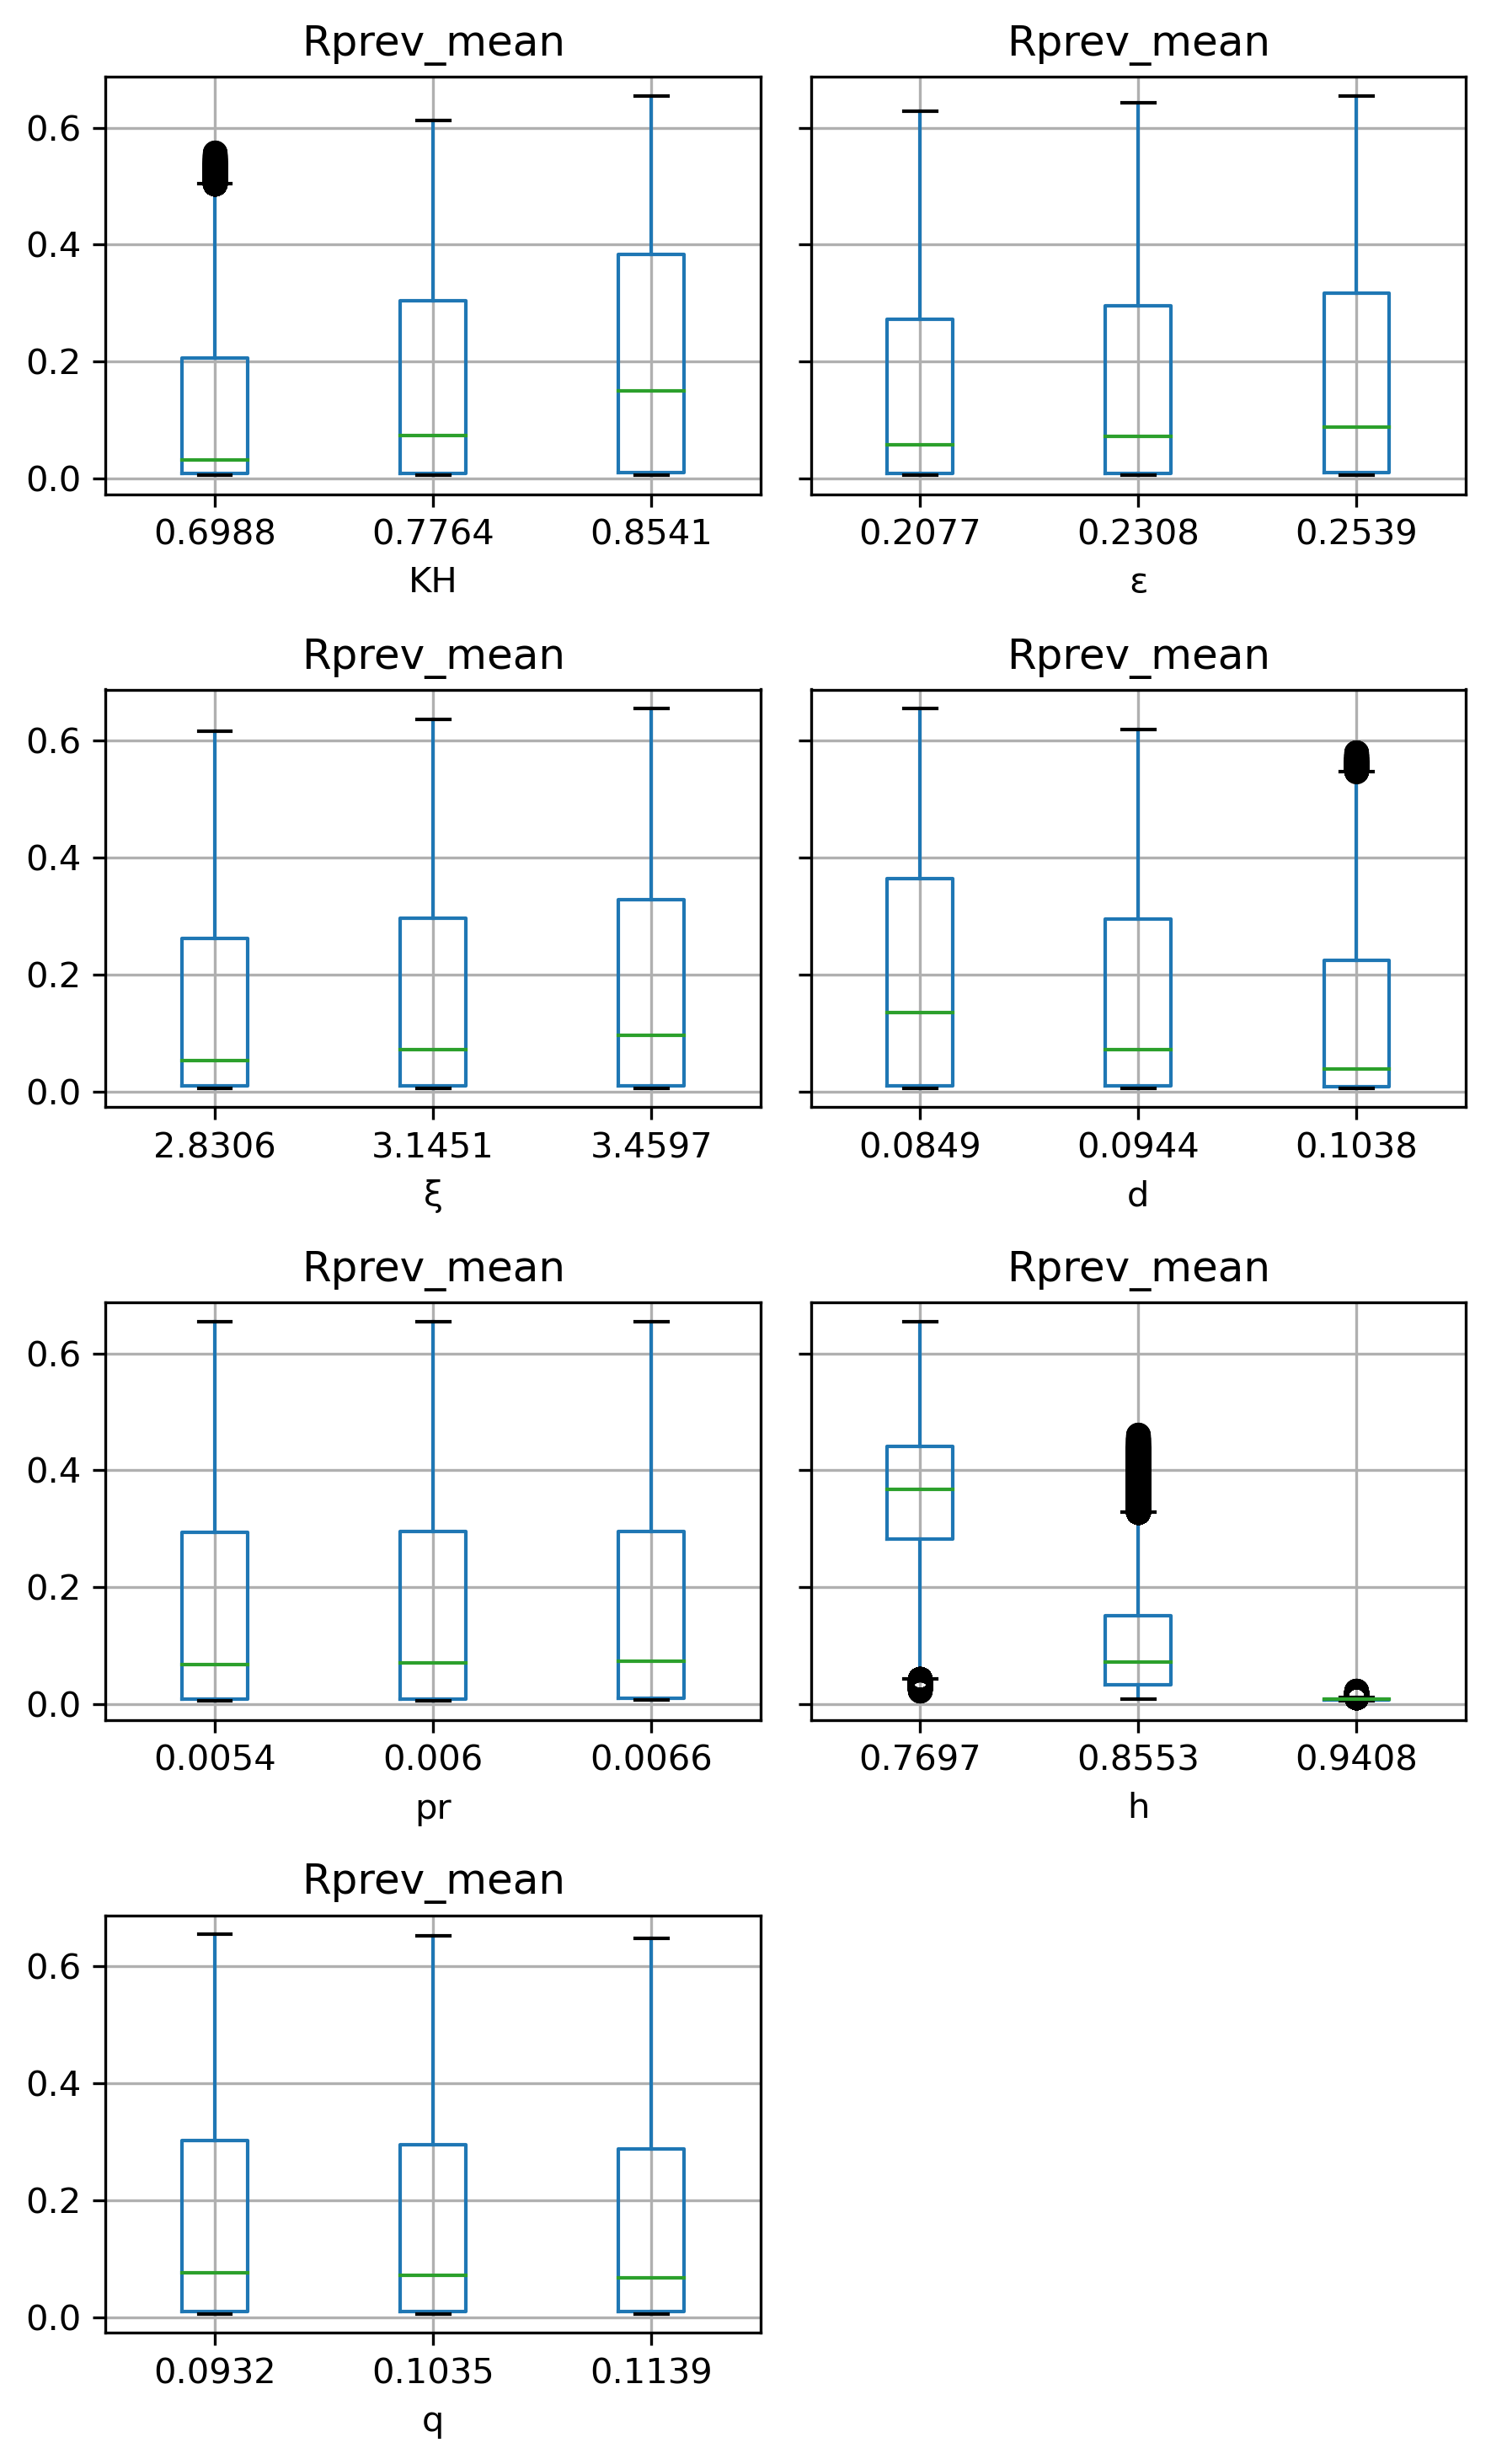

In [26]:
s_t=time.time()
f,axs=plt.subplots(4,2,figsize=(6,10),dpi=300,sharey=True)
for i,ax in enumerate(axs.flatten()):
    if i>=len(sel_pars):
        ax.axis('off')
        continue
    res.boxplot('Rprev_mean',by=sel_pars[i],ax=ax)
    subfig = ax.get_figure()
    subfig.suptitle('')
    ax.set_ylabel('')
    ax.set_xlabel(col2script[sel_pars[i]])
plt.tight_layout()
e_t=time.time()-s_t
print('Elapsed time: {} sec'.format(e_t))

We can see that the hand washing probability _h_ has a wide impact on the model output. In particular, when the hand washing probability is high, the resistan prevalence is very low undependently of other parameters.

# Change w.r.t. normal conditions

In [7]:
out='Rprev_mean'

df_imp=pd.DataFrame(columns=['Change +10%','Change -10%','Rel. Change +10%','Rel. Change -10%'],index=sel_pars)
for col in tqdm(sel_pars):
    ot_cols=par_cols.copy()
    ot_cols.remove(col)
    df_col=res.loc[(res[ot_cols]==res[ot_cols].median()).prod(axis=1).astype('bool'),:]
    c10p=df_col.loc[df_col[col]==df_col[col].max(),out].iloc[0] - df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0]
    c10m=df_col.loc[df_col[col]==df_col[col].min(),out].iloc[0] - df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0]
    cr10p=(df_col.loc[df_col[col]==df_col[col].max(),out].iloc[0] - df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0])/df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0]
    cr10m=(df_col.loc[df_col[col]==df_col[col].min(),out].iloc[0] - df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0])/df_col.loc[df_col[col]==df_col[col].median(),out].iloc[0]
    
    df_imp.loc[col,:]=[c10p,c10m,cr10p,cr10m]

In [6]:
df_imp

,Change +10%,Change -10%,Rel. Change +10%,Rel. Change -10%
Kh,0.0776,-0.0444,1.00129,-0.572903
eps,0.017,-0.0148,0.219355,-0.190968
xi,0.0255,-0.0208,0.329032,-0.268387
dmean,-0.0366,0.066,-0.472258,0.851613
pr,0.0029,-0.0031,0.037419,-0.04
h,-0.0691,0.2962,-0.891613,3.821935
q,-0.005,0.0052,-0.064516,0.067097


In [13]:
(df_imp.iloc[:,:2].T*100).to_csv('csvs/one_par_prev.csv',sep=';')
df_single=(df_imp.iloc[:,:2].T*100).astype(float)
print(df_single)

               Kh   eps    xi  dmean    pr      h     q
Change +10%  7.76  1.70  2.55  -3.66  0.29  -6.91 -0.50
Change -10% -4.44 -1.48 -2.08   6.60 -0.31  29.62  0.52


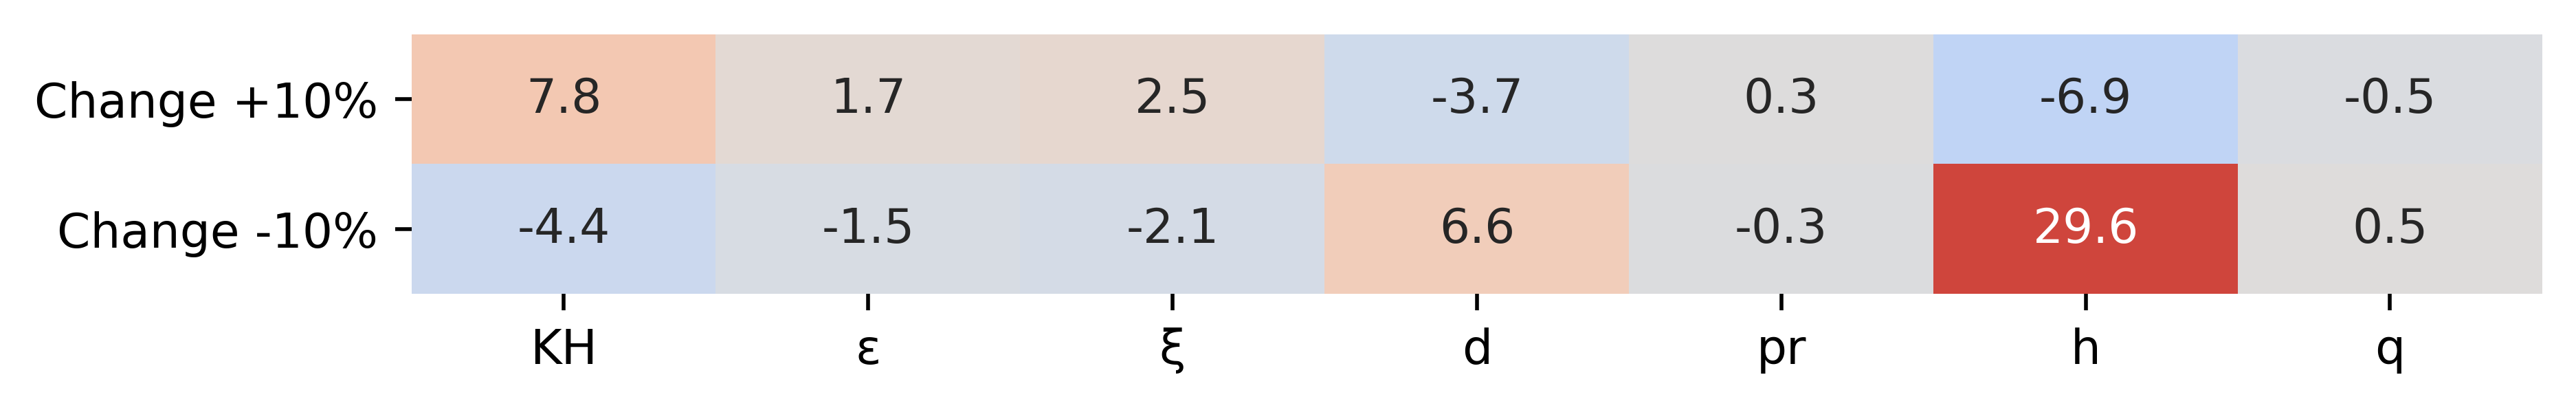

In [29]:
scripts=[col2script[col] for col in df_single.columns]
f=plt.figure(dpi=500,figsize=(8,1))
sns.heatmap(df_single,cmap='coolwarm',center=0,vmin=-7,vmax=35,annot=True,fmt=".1f",annot_kws={"fontsize":10},
           xticklabels=scripts,cbar=False)
plt.xticks(rotation=0) 
plt.show()

In [8]:
# Those dictionaries allows to align the different parameters in the direction of increasing the prevalence
par2pos={'wrf':pd.DataFrame.min,'wsf':pd.DataFrame.max,'Kh':pd.DataFrame.max,'alpha':pd.DataFrame.max,
         'eps':pd.DataFrame.max, 'xi':pd.DataFrame.max,'dmean':pd.DataFrame.min,'a':pd.DataFrame.max,
         'pr':pd.DataFrame.max,'ps':pd.DataFrame.min,'muh':pd.DataFrame.min,'gamma':pd.DataFrame.max,
         'h':pd.DataFrame.min,'q':pd.DataFrame.min}
par2neg={'wrf':pd.DataFrame.max,'wsf':pd.DataFrame.min,'Kh':pd.DataFrame.min,'alpha':pd.DataFrame.min,
         'eps':pd.DataFrame.min, 'xi':pd.DataFrame.min,'dmean':pd.DataFrame.max,'a':pd.DataFrame.min,
         'pr':pd.DataFrame.min,'ps':pd.DataFrame.max,'muh':pd.DataFrame.max,'gamma':pd.DataFrame.min,
         'h':pd.DataFrame.max,'q':pd.DataFrame.max}

In [20]:
# Variazione combinata rispetto alla baseline
# Prova in tutte le direzioni, però prima mettili direzione sinergica 
# (cioè che aumentare entrambi significhi aumentare gli infetti)
out='Rprev_mean'

df_pp_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_pm_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_mp_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_mm_pita=pd.DataFrame(index=par_cols,columns=par_cols)

for i,col1 in tqdm(enumerate(par_cols),total=len(par_cols)):
    for j in range(0,len(par_cols)):
        col2=par_cols[j]
        if col1==col2:
            continue
        pf1=par2pos[col1]
        pf2=par2pos[col2]
        nf1=par2neg[col1]
        nf2=par2neg[col2]
        ot_cols=par_cols.copy()
        ot_cols.remove(col1)
        ot_cols.remove(col2)
        df_col=res.loc[(res[ot_cols]==res[ot_cols].median()).prod(axis=1).astype('bool'),:]
        cpp=df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]
        cpm=df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]
        cmp=df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]
        cmm=df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]
        df_pp_pita.loc[col1,col2]=cpp
        df_pm_pita.loc[col1,col2]=cpm
        df_mp_pita.loc[col1,col2]=cmp
        df_mm_pita.loc[col1,col2]=cmm

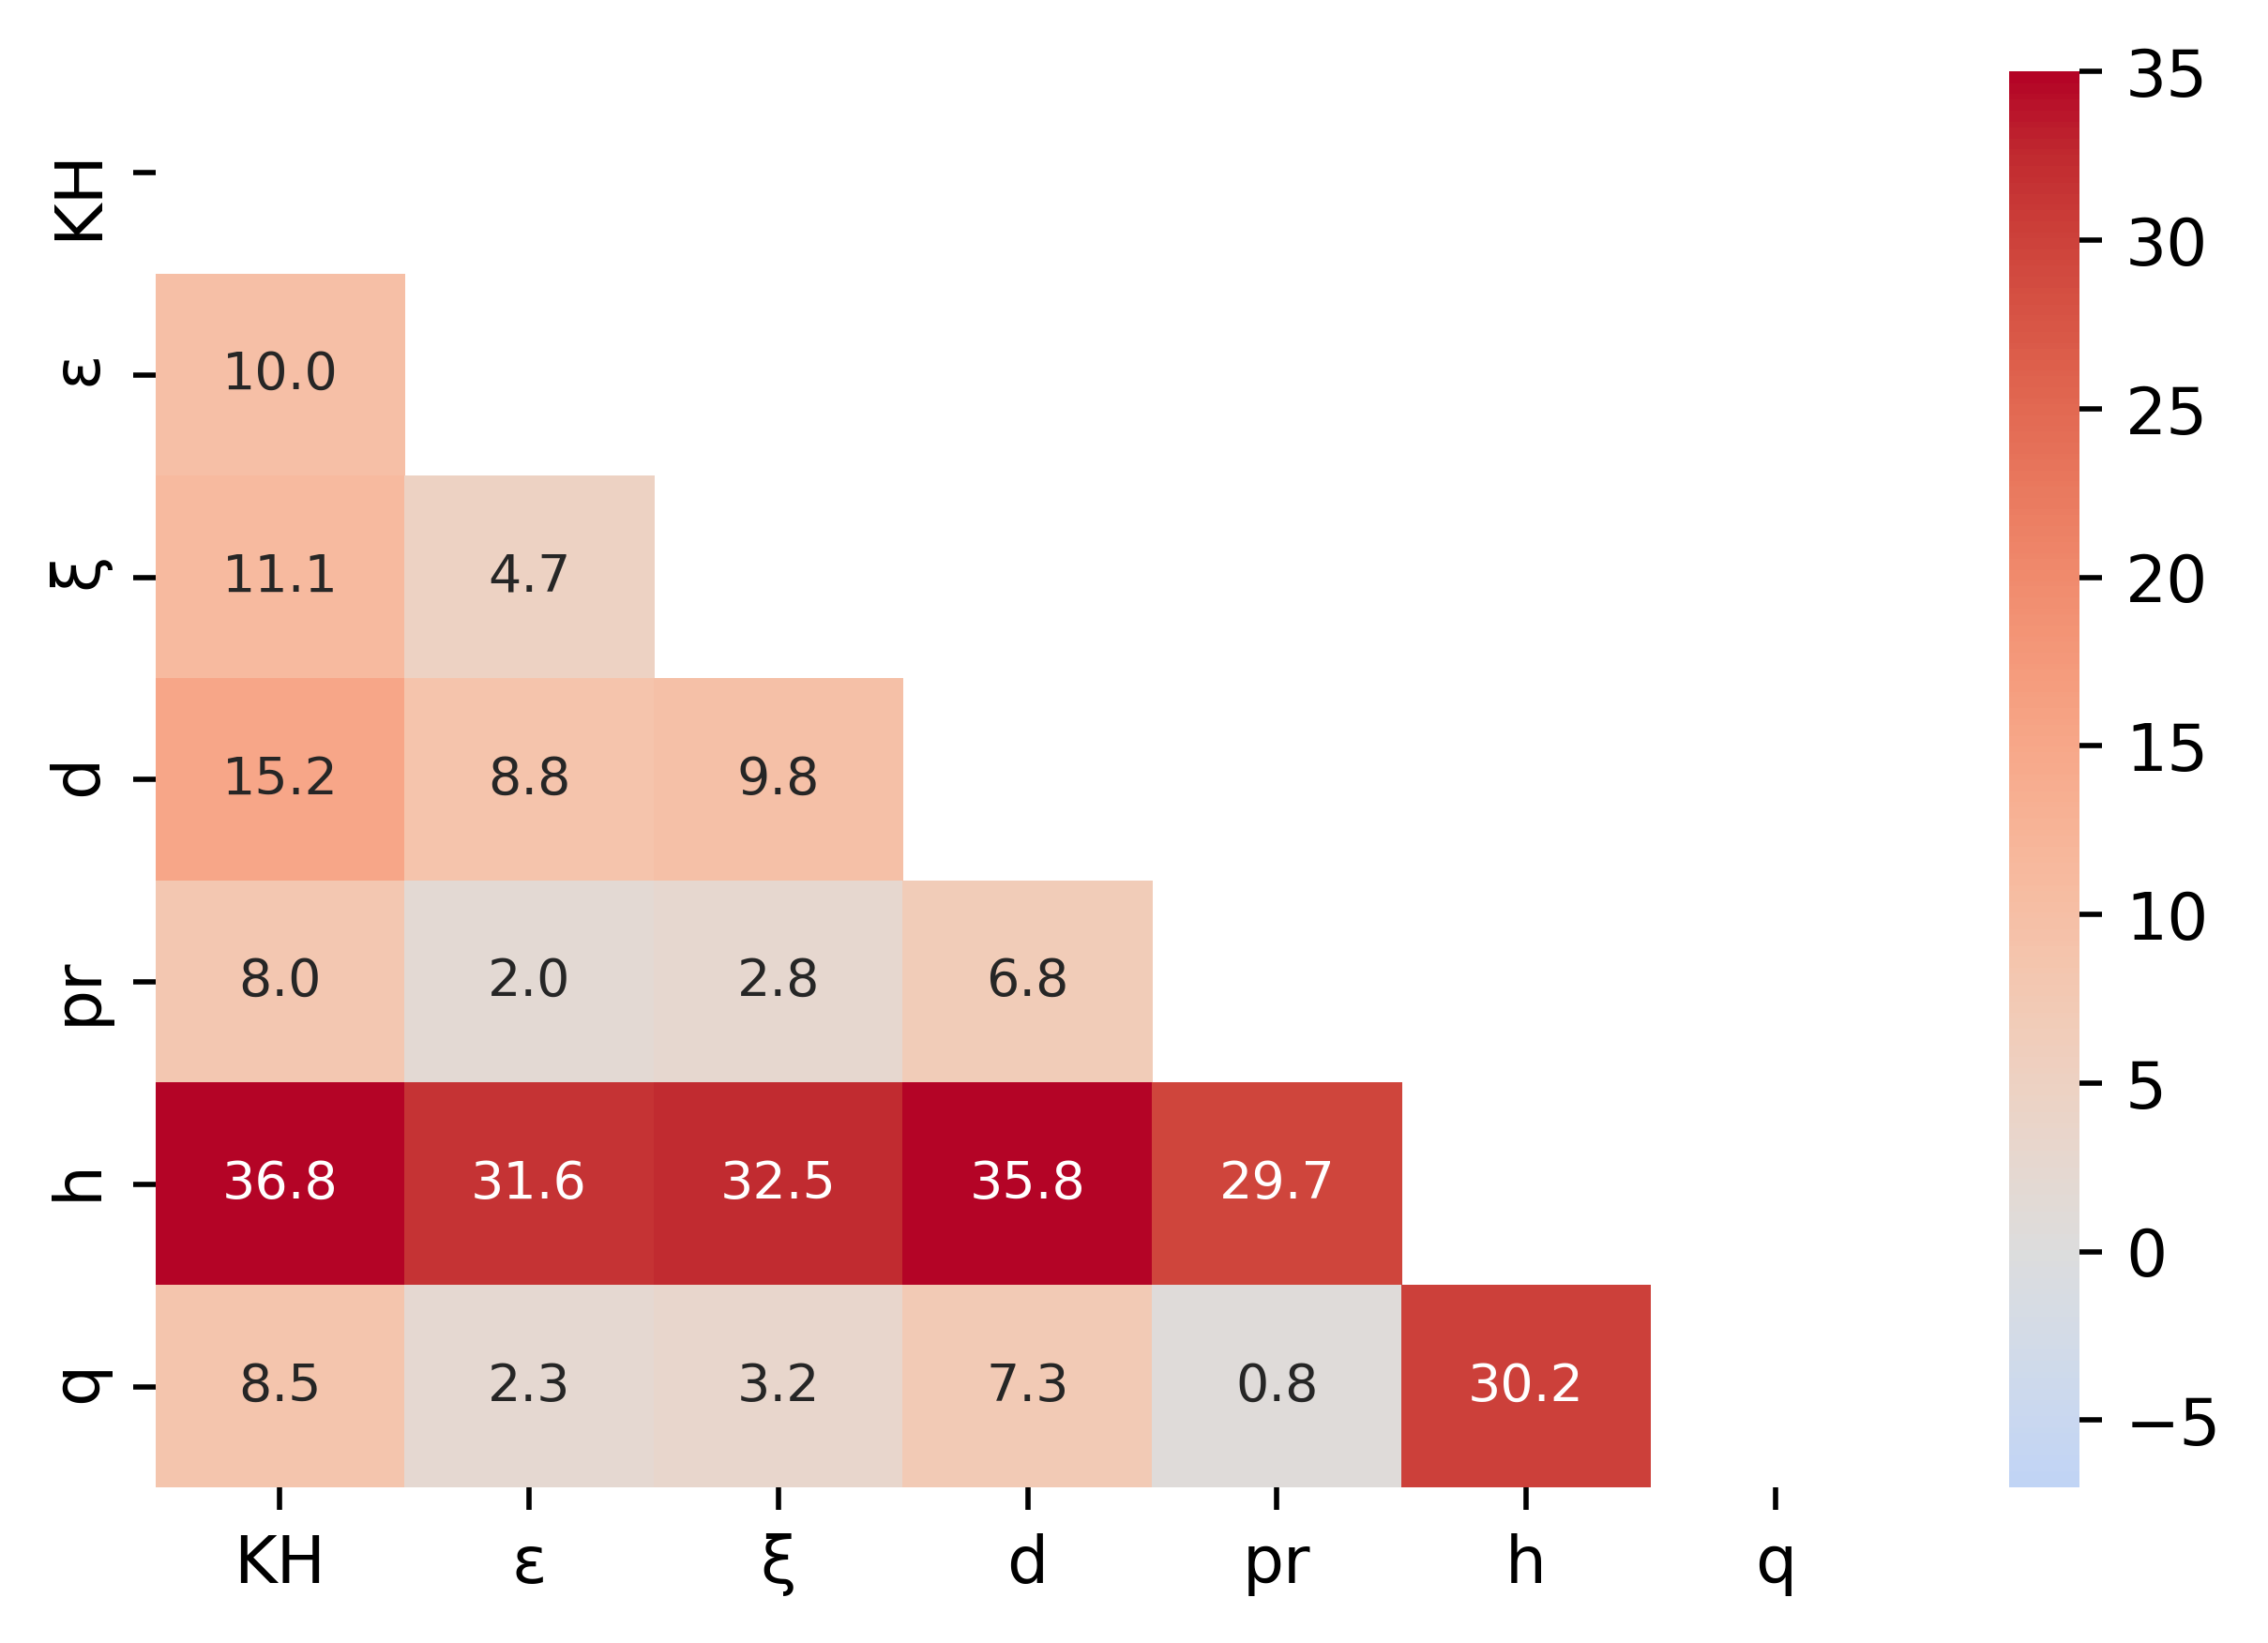

In [32]:
scripts=[col2script[col] for col in sel_pars]
f=plt.figure(dpi=500)
matrix = np.triu(df_pp_pita.loc[sel_pars,sel_pars])
sns.heatmap(df_pp_pita.loc[sel_pars,sel_pars].fillna(0)*100,cmap='coolwarm',center=0,vmin=-7,vmax=35,
            annot=True,fmt=".1f",annot_kws={"fontsize":8},
           xticklabels=scripts,yticklabels=scripts, mask=matrix,cbar=True)
plt.xticks(rotation=0) 
plt.show()


# Cooperation coefficient

In [ ]:
# Cooperation coefficient
# Ratio between combined effecte (squared) and sum of single effects (squared)
out='Rprev_mean'

df_pp_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_pm_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_mp_pita=pd.DataFrame(index=par_cols,columns=par_cols)
df_mm_pita=pd.DataFrame(index=par_cols,columns=par_cols)

for i,col1 in tqdm(enumerate(par_cols),total=len(par_cols)):
    for j in range(0,len(par_cols)):
        col2=par_cols[j]
        if col1==col2:
            continue
        pf1=par2pos[col1]
        pf2=par2pos[col2]
        nf1=par2neg[col1]
        nf2=par2neg[col2]
        ot_cols=par_cols.copy()
        ot_cols.remove(col1)
        ot_cols.remove(col2)
        df_col=res.loc[(res[ot_cols]==res[ot_cols].median()).prod(axis=1).astype('bool'),:]
        cpp=(df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
            /((df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2\
              + (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2)
        cpm=(df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
            /((df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2\
              - (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2)
        cmp=(df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
            /((df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2\
              - (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2)
        cmm=(df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
            /((df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2\
              + (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] - df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2)
        #cpp=(df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
        #    /((df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])\
        #      * (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]))
        #cpm=(df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
        #    /((df_col.loc[(df_col[col1]==pf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])\
        #      * (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]))
        #cmp=(df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
        #    /((df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])\
        #      * (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==pf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]))
        #cmm=(df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])**2 \
        #    /((df_col.loc[(df_col[col1]==nf1(df_col[col1]))&(df_col[col2]==df_col[col2].median()),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0])\
        #      * (df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==nf2(df_col[col2])),out].iloc[0] / df_col.loc[(df_col[col1]==df_col[col1].median())&(df_col[col2]==df_col[col2].median()),out].iloc[0]))
        df_pp_pita.loc[col1,col2]=cpp
        df_pm_pita.loc[col1,col2]=cpm
        df_mp_pita.loc[col1,col2]=cmp
        df_mm_pita.loc[col1,col2]=cmm

In [38]:
df_pp_pita.loc[sel_pars,sel_pars]

,Kh,eps,xi,dmean,pr,h,q
Kh,NaN,1.59094,1.830071,2.226299,1.05603,1.442858,1.183236
eps,1.59094,NaN,2.381996,1.678555,1.31818,1.13658,1.673839
xi,1.830071,2.381996,NaN,1.938027,1.20736,1.196531,1.493068
dmean,2.226299,1.678555,1.938027,NaN,1.068848,1.393274,1.215823
pr,1.05603,1.31818,1.20736,1.068848,NaN,1.005313,1.850776
h,1.442858,1.13658,1.196531,1.393274,1.005313,NaN,1.040603
q,1.183236,1.673839,1.493068,1.215823,1.850776,1.040603,NaN


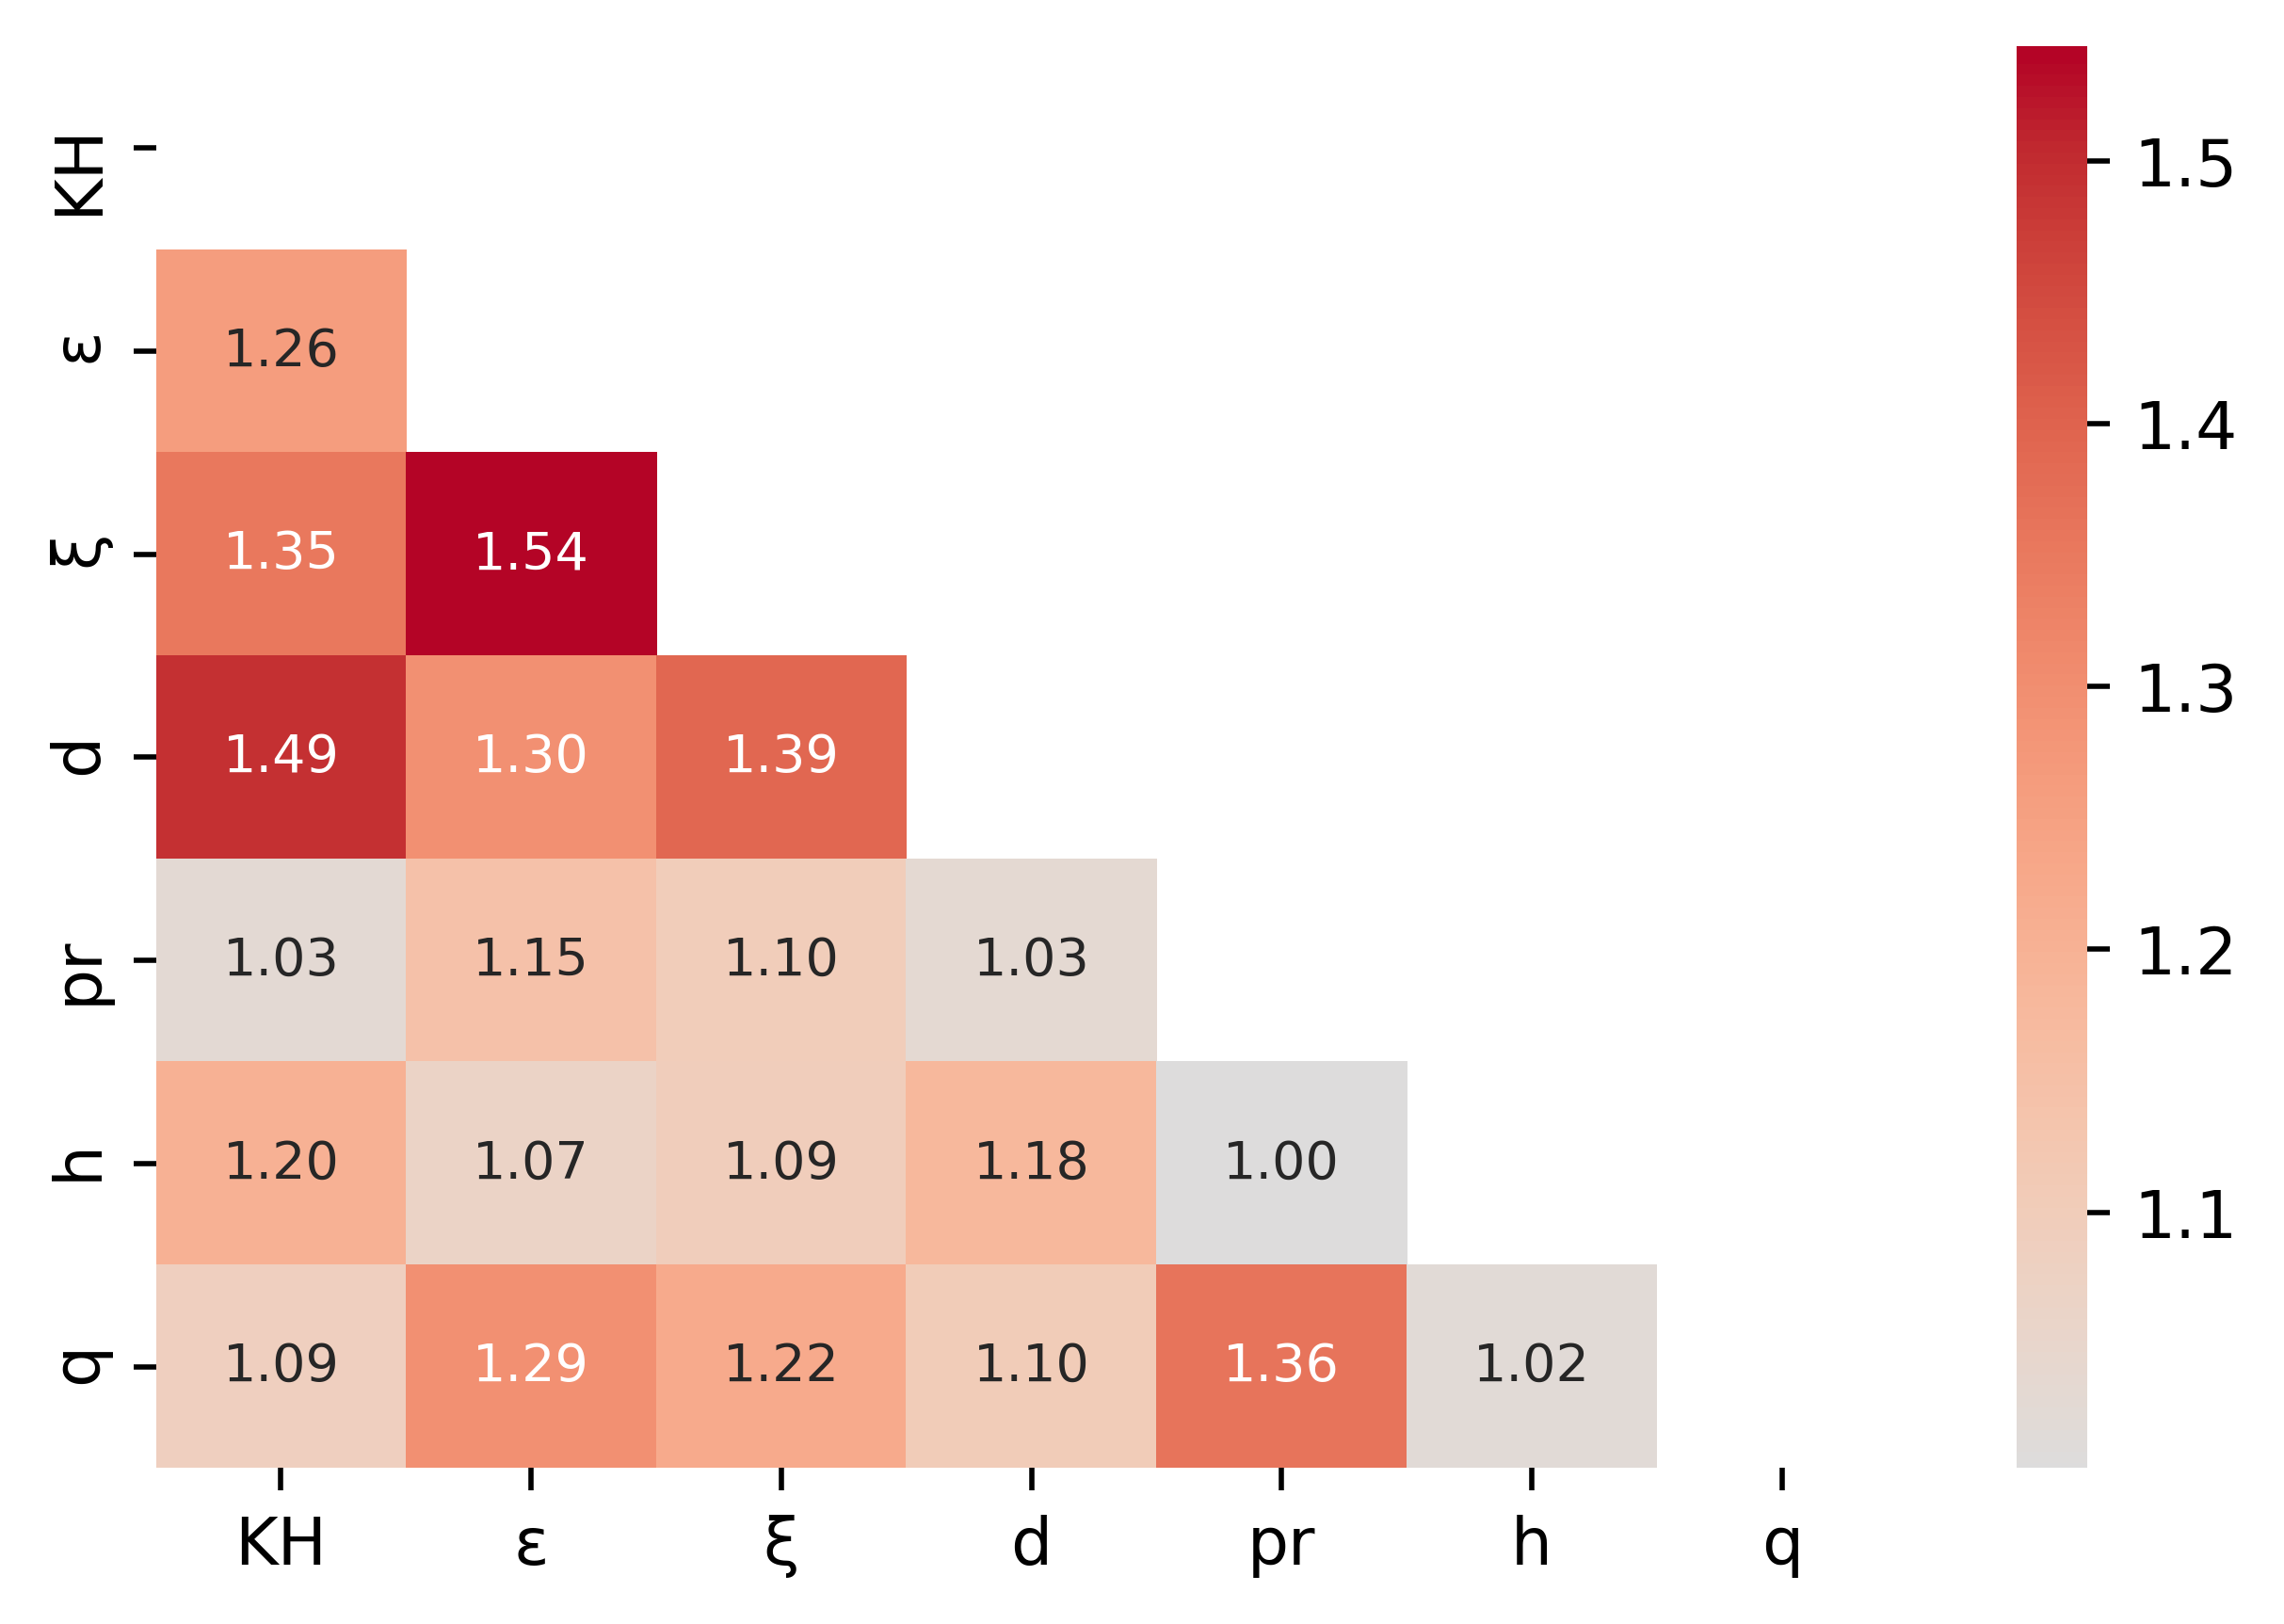

In [39]:
scripts=[col2script[col] for col in sel_pars]
f=plt.figure(dpi=500)
matrix = np.triu(df_pp_pita.loc[sel_pars,sel_pars])
sns.heatmap(np.sqrt(df_pp_pita.loc[sel_pars,sel_pars].fillna(1)),cmap='coolwarm',center=1,annot=True,fmt=".2f",
            annot_kws={"fontsize":8},
           xticklabels=scripts,yticklabels=scripts,mask=matrix)
plt.xticks(rotation=0) 
plt.show()
